# 네이버 영화 평점 분석

In [11]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [411]:
# plot 시 한글이 깨지는 현상 방지!

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

##### 2019년 의 영화 평점 데이터를 가져옵니다.

In [247]:
import time

date = pd.date_range('20190101', periods=365, freq='d')

movie_date = []
movie_name = []
movie_point = []

for today in date:
    #html 주소
    html = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    
    #html {}.format(date)를 사용해 파싱함으로써 해당 날짜에 해당하는 평점 정보 출력 
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    #soup으로 파싱
    soup = BeautifulSoup(response, "html.parser")
    
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])
    time.sleep(1)

In [12]:
movie = pd.read_csv('../data/2019년 네이버 영화 평점 리스트.csv')
movie['date'] = pd.to_datetime(movie['date'],format="%Y-%m-%d")

### 수집된 데이터에 대한 이해

- "현재"상영 중인 영화들을 '하루단위'로 '1년간' 수집한 정보. 
- 카운트되는 것은 얼마나 오래 상영되었는가를 반영하고, 얼마나 많은 리뷰가 남겼는지를 의미하지 않는다.


In [13]:
# 수집된 데이터 정보 확인
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16011 entries, 0 to 16010
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16011 non-null  datetime64[ns]
 1   name    16011 non-null  object        
 2   point   16011 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 375.4+ KB


In [14]:
movie.head()

,date,name,point
0,2019-01-01,보헤미안 랩소디,9.49
1,2019-01-01,헌터 킬러,9.43
2,2019-01-01,폴란드로 간 아이들,9.42
3,2019-01-01,트루먼 쇼,9.32
4,2019-01-01,점박이 한반도의 공룡2 : 새로운 낙원,9.24


In [15]:
movie.set_index('date',inplace=True)

### 얼마나 오래 상영되었고,  얼마나 오래 비슷한 평점대를 유지하는가? 
- assumption1 : 평점이 올라갔다가 금방 내려간다 -> 광고를 많이 했을 것
- assumption2 : 평점이 높은데도 상영기간이 짧았던 것 - > 상영관 확보 실패? 

In [16]:
#함수만들기! -> 영화이름을 인자로 넣으면 해당 영화의 평점 추이를 보여주는 함수
def trend(name):
    plt.figure(figsize=(10,5))
    for i in name:
       
        plt.plot(movie[movie['name']==i]['point'],label=i)
    plt.legend(bbox_to_anchor=(1, 1.0))
    plt.xticks(rotation=45)
    plt.show()

   



C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0, flags=flags)


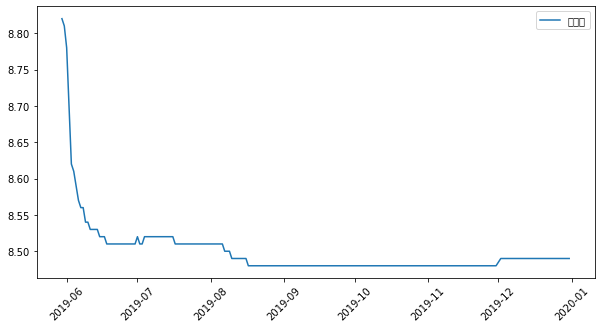

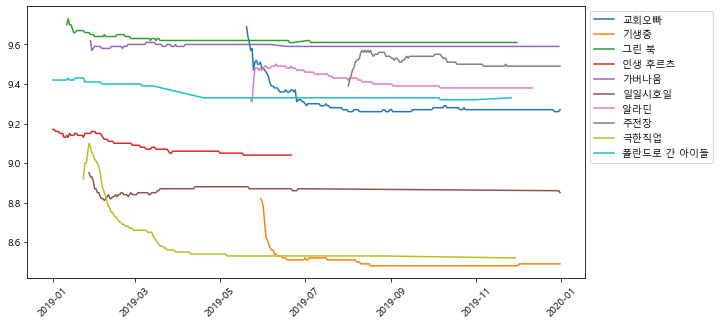

In [602]:
#상영기간 및 평점평균 상위 10개 도표. 
top_10 = movie.groupby(by=['name']).agg(['mean','count']).sort_values(by=[('point','count'),('point','mean')],ascending=[False,False]).head(10).index
trend(top_10)




In [599]:
#중간 결론
#랭크된 한국영화 3작품 - 극한직업, 기생충, 교회오빠는 초반 평점이 상대적으로 높고 이후 급락하는 기조를 보이는 반면
#2019년 중 개봉된 외국영화 - 알라딘, 주전장 등은 초반 평점보다 후반 평점이 더 높은 경향을 보임

#이는 한국영화가 내수 시장에서의 광고효과를 더 보기 때문이라고 여겨짐. 

#검증을 위해 10~20, 21~30위권 통계도 찾아본다.

,name,point
date,,
2019-11-14,80일간의 세계일주,7.18


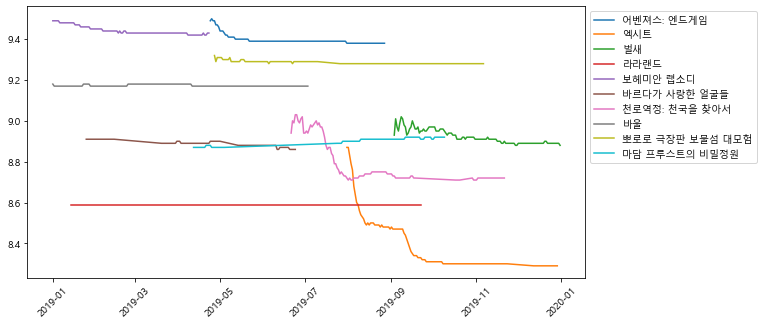

In [610]:

#10~20위권 통계

top_10to20 = movie.groupby(by=['name']).agg(['mean','count']).sort_values(by=[('point','count'),('point','mean')],ascending=[False,False]).head(20).index
trend(top_10to20[10:])

#'엑시트'의 평점 급락은 제기된 가정을 지지하는듯 하나, 
#천로역정(미국영화)의 유사한 패턴은 가정을 뒷받침하지 않음.
#추가적인 정보 필요.

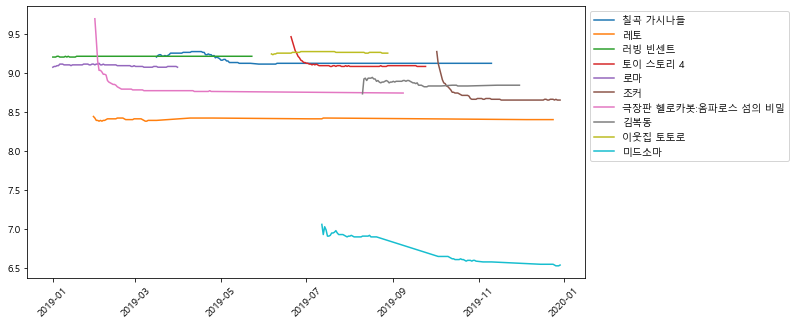

In [612]:
top_20to30 = movie.groupby(by=['name']).agg(['mean','count']).sort_values(by=[('point','count'),('point','mean')],ascending=[False,False]).head(30).index
trend(top_20to30[20:])




In [ ]:
#한국영화 총계 
#상위 30위중 한국영화의 갯수는
#1~10위 중에 4개
#11~20위 중에 3개
#21~30위 중에 3개 

#그중 평점 급락 패턴을 보이는 영화는 6개. 
#평점 급락패턴을 보이지 않은 영화는 전부 다큐멘터리/독립영화. except for 1 
#그 외 나머지는 평점 급락 패턴을 보인다. 


#외국영화
#전체 20개중
#급락 패턴 보이는 영화 
#천로역정, 토이스토리, 조커 
#나머지 17개는 안정세 혹은 오히려 상승세를 보임. 


#잠정결론 
#외국영화의 시장성이 큰 편이며 
#평점 급락은 광고에 의존한 일시적 흥행의 여파로 보임. 


### 확정 결론을 위한 필요 데이터들

- 상영일자가 길다고 하여 상영관을 많이 확보한 것은 아니다. 
    - 교회오빠의 경우 '상영기간'도 길고 평점도 높지만 실제 관객수는 113,035명
    <br><br>
    

- 평점과 실제 인기와의 상관관계를 알기 위해서는 몇개의 평점이 남겨졌는지에 대한 데이터가 필요하다.
    - 기생충의 경우 평점 참여자  37389명. 관객수 1000만명
    <br><br>
    
    
- 광고효과를 분석하기 위한 영화계 내부 홍보시스템에 대한 도메인 지식이 필요 할듯. 

